# 中央競馬

In [1]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [2]:
%autoreload

In [3]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [4]:
pd.options.display.max_columns = 300

In [5]:
df = df[df['race_type'] != 2]

In [6]:
df.drop(['weather', 'ground_state'], errors='ignore', axis=1, inplace=True)

In [7]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,j

In [8]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [9]:
df_t = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_22_to_23.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str})
df_t

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,j

In [10]:
df_t = df_t[df_t['race_type'] != 2]

In [11]:
df_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
for col in df.columns:
    print(col)

race_id
horse_id
jockey_id
trainer_id
rank
frame
number
sex
age
impost
win_odds
popularity
date
race_type
around
course_len
race_class
place
month
month_sin
month_cos
season
season_sin
season_cos
reference_date
rank_mean
rank_min
rank_max
n_horses_mean
rank_diff_mean
3_furlongs_mean
3_furlongs_median
time_median
prize_mean
prize_sum
course_len_mean
course_len_median
course_len_min
course_len_max
win_rate_past_1
place_rate_past_1
show_rate_past_1
win_rate_past_2
place_rate_past_2
show_rate_past_2
win_rate_past_5
place_rate_past_5
show_rate_past_5
win_rate
place_rate
show_rate
win_rate_autumn
win_rate_spring
win_rate_summer
win_rate_winter
place_rate_autumn
place_rate_spring
place_rate_summer
place_rate_winter
show_rate_autumn
show_rate_spring
show_rate_summer
show_rate_winter
rank_mean_past_1
rank_min_past_1
rank_max_past_1
n_horses_mean_past_1
rank_diff_mean_past_1
3_furlongs_mean_past_1
3_furlongs_median_past_1
time_median_past_1
prize_mean_past_1
prize_sum_past_1
course_len_mean_past

## RFmodel

In [110]:
%autoreload

In [111]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = rf.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[8957 2085]
 [1246 1893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84     11042
           1       0.48      0.60      0.53      3139

    accuracy                           0.77     14181
   macro avg       0.68      0.71      0.69     14181
weighted avg       0.79      0.77      0.77     14181

Accuracy: 0.7651082434243002
Selected Feature Importance:

prize_mean_in_mode_course_len_past_1: 0.05977318419976073
rank_mean_in_mode_course_len_past_1: 0.05678248265596839
rank_mean_in_mode_course_len_past_2: 0.053671562631216224
race_id_encoded: 0.04979751834470619
horse_id: 0.04777138282246092
rank_mean_in_mode_course_len_past_5: 0.04209754308014722
prize_sum_in_mode_course_len_past_1: 0.03617596411012022
rank_diff_mean_in_mode_course_len_past_1: 0.03481967783860347
prize_mean_in_mode_course_len_past_2: 0.03447937655579994
prize_sum: 0.03390980547246218
prize_mean_past_5: 0.03279999205716369


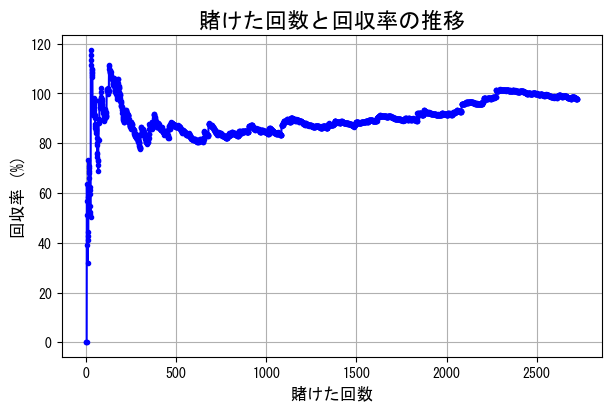

総払い戻し金額: 630820.0円
賭けた回数: 2724回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [ ]:
rf.plot_returns_rate(df_t)

In [28]:
rf_returns = rf.calc_results(df_t)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [18]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
10,202330051109,1210.0,200,5400,1210.0,0.224074,-4190.0
12,202330051708,3230.0,600,6600,4440.0,0.672727,-2160.0
14,202330053010,2140.0,200,7400,6580.0,0.889189,-820.0
167,202330110807,12150.0,600,94400,18730.0,0.198411,-75670.0
279,202342032412,590.0,200,156800,19320.0,0.123214,-137480.0
285,202342052905,1820.0,200,159600,21140.0,0.132456,-138460.0
336,202343011804,9140.0,600,189400,30280.0,0.159873,-159120.0
476,202347072005,1960.0,600,269400,32240.0,0.119673,-237160.0
565,202348032908,1410.0,200,318800,33650.0,0.105552,-285150.0
612,202348071207,20720.0,600,345000,54370.0,0.157594,-290630.0


In [19]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target


## NNmodel

In [65]:
%autoreload

In [66]:
nn = predict.NNModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = nn.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())

Confusion Matrix:
 [[8960 2346]
 [1347 1794]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83     11306
           1       0.43      0.57      0.49      3141

    accuracy                           0.74     14447
   macro avg       0.65      0.68      0.66     14447
weighted avg       0.77      0.74      0.76     14447

Accuracy: 0.7443759950162664
predicted_target
0    41804
1    17768
Name: count, dtype: int64


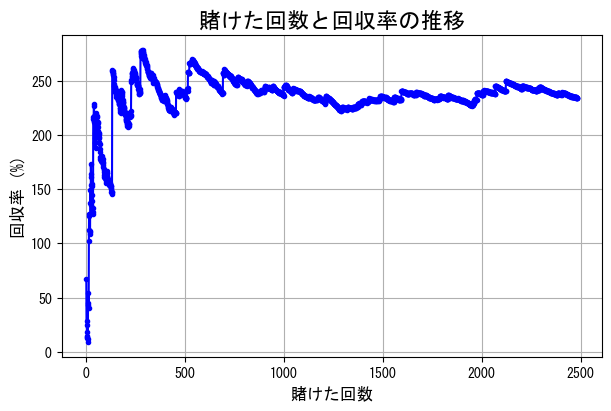

総払い戻し金額: 1679110.0円
賭けた回数: 2482回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,300,300,200.0,0.666667,-100.0
1,202201010102,0.0,400,700,200.0,0.285714,-500.0
2,202201010103,0.0,100,800,200.0,0.250000,-600.0
3,202201010106,0.0,300,1100,200.0,0.181818,-900.0
4,202201010108,0.0,300,1400,200.0,0.142857,-1200.0
...,...,...,...,...,...,...,...
2477,202310030709,0.0,100,715800,1676510.0,2.342149,960710.0
2478,202310030710,0.0,100,715900,1676510.0,2.341821,960610.0
2479,202310030712,0.0,600,716500,1676510.0,2.339860,960010.0
2480,202310030802,2600.0,600,717100,1679110.0,2.341528,962010.0


In [67]:
nn.plot_returns_rate(df_t)

## LGBmodel

In [94]:
%autoreload

In [95]:
lgb = predict.LGBModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.60, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = lgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 12844, number of negative: 12844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30563
[LightGBM] [Info] Number of data points in the train set: 25688, number of used features: 221
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 12844, number of negative: 12844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4564
[LightGBM] [Info] Number of data points in the train set: 25688, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[9221 2085]
 [1235 1906]]
Classification Report:
               precision    recall  f1-score   supp

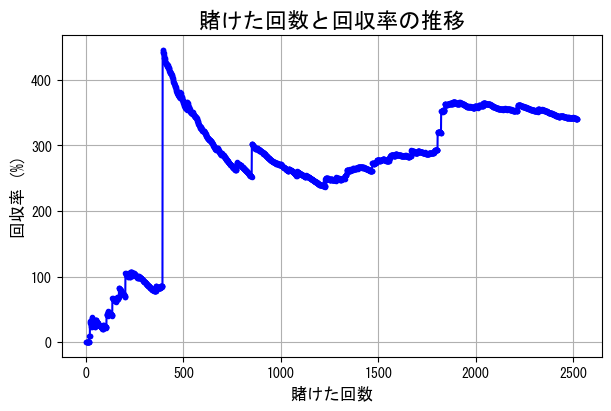

総払い戻し金額: 2441420.0円
賭けた回数: 2521回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,600,600,0.0,0.000000,-600.0
1,202201010106,0.0,300,900,0.0,0.000000,-900.0
2,202201010109,0.0,100,1000,0.0,0.000000,-1000.0
3,202201010110,0.0,400,1400,0.0,0.000000,-1400.0
4,202201010202,0.0,300,1700,0.0,0.000000,-1700.0
...,...,...,...,...,...,...,...
2516,202310030712,0.0,400,717900,2441420.0,3.400780,1723520.0
2517,202310030803,0.0,100,718000,2441420.0,3.400306,1723420.0
2518,202310030804,0.0,600,718600,2441420.0,3.397467,1722820.0
2519,202310030807,0.0,400,719000,2441420.0,3.395577,1722420.0


In [96]:
lgb.plot_returns_rate(df_t)

## XGBmodel

In [48]:
%autoreload

In [49]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = xgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[5008 1235]
 [ 900 1014]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6243
           1       0.45      0.53      0.49      1914

    accuracy                           0.74      8157
   macro avg       0.65      0.67      0.66      8157
weighted avg       0.75      0.74      0.75      8157

Accuracy: 0.738261615790119
Selected Feature Importance:
                                            feature  importance
70             rank_mean_in_mode_course_len_past_5    0.039180
73        rank_diff_mean_in_mode_course_len_past_5    0.038382
100                jockey_stakes_participation_sum    0.018938
108                  jockey_flat_participation_sum    0.018309
15                                        rank_min    0.017024
76            prize_mean_in_mode_course_len_past_5    0.016031
93                             jockey_n_top_2_mean    0.015701
71              rank_min_in_mode_course_l

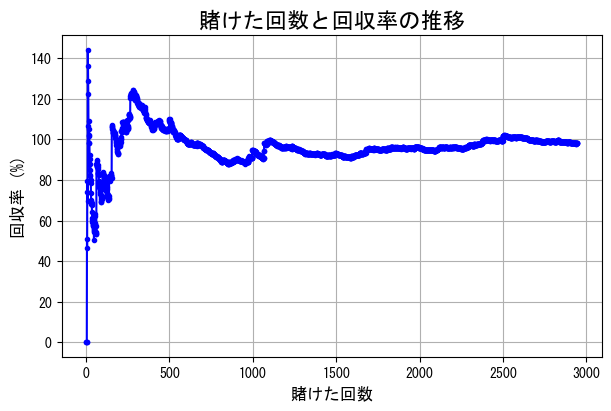

総払い戻し金額: 704780.0円
賭けた回数: 2945回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041901,0.0,100,100,0.0,0.000000,-100.0
1,202330041903,0.0,100,200,0.0,0.000000,-200.0
2,202330041904,0.0,600,800,0.0,0.000000,-800.0
3,202330041905,0.0,100,900,0.0,0.000000,-900.0
4,202330041907,510.0,100,1000,510.0,0.510000,-490.0
...,...,...,...,...,...,...,...
2940,202350123107,2690.0,1000,718000,704780.0,0.981588,-13220.0
2941,202350123108,0.0,100,718100,704780.0,0.981451,-13320.0
2942,202350123109,0.0,300,718400,704780.0,0.981041,-13620.0
2943,202350123110,0.0,600,719000,704780.0,0.980223,-14220.0


In [50]:
xgb.plot_returns_rate(df_t)

## Ensamblemodel

In [19]:
%autoreload

In [20]:
# df = df.drop(columns=[col for col in df.columns if 'rank' in col and col != 'rank'])
# df_t = df_t.drop(columns=[col for col in df_t.columns if 'rank' in col and col != 'rank'])

In [21]:
pd.set_option('display.max_rows', 50)

In [22]:
df

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,j

In [23]:
df_t

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,j

In [108]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.7, 
  max_bet=600, pivot_horse=True, select_features=True, 
  select_num=200, final_model='xgb',save=True,
)
pred_df = en.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[988 103]
 [185 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1091
           1       0.58      0.44      0.50       329

    accuracy                           0.80      1420
   macro avg       0.71      0.67      0.69      1420
weighted avg       0.78      0.80      0.79      1420

Accuracy: 0.7971830985915493
Selected Feature Importance:

rank_mean_in_mode_course_len_past_1: 0.030272145801808925
rank_mean_in_mode_course_len_past_2: 0.02684687330290561
prize_mean_in_mode_course_len_past_2: 0.020261095851017433
prize_mean_in_mode_course_len_past_1: 0.01943305885634321
rank_min_in_mode_course_len_past_1: 0.01765272231435034
rank_mean_in_mode_course_len_past_5: 0.016493925859210962
rank_diff_mean_in_mode_course_len_past_1: 0.015878823778420714
prize_sum_in_mode_course_len_past_1: 0.01566951165948427
prize_mean_in_mode_course_len_past_5: 0.013977284509124943
prize_

In [109]:
pd.set_option('display.max_rows', 50)

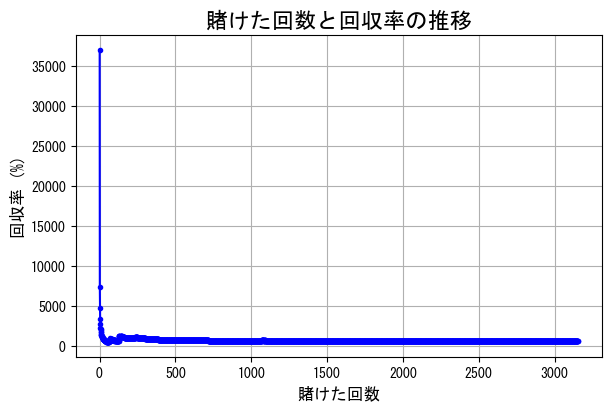

総払い戻し金額: 5326360.0円
賭けた回数: 3152回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202204020412,37000.0,100,100,37000.0,370.000000,36900.0
1,202309030211,0.0,400,500,37000.0,74.000000,36500.0
2,202308010104,760.0,300,800,37760.0,47.200000,36960.0
3,202209020607,0.0,300,1100,37760.0,34.327273,36660.0
4,202203020603,990.0,300,1400,38750.0,27.678571,37350.0
...,...,...,...,...,...,...,...
3147,202309040606,0.0,100,870800,5326360.0,6.116628,4455560.0
3148,202206040812,0.0,100,870900,5326360.0,6.115926,4455460.0
3149,202209060408,0.0,100,871000,5326360.0,6.115224,4455360.0
3150,202309010311,0.0,100,871100,5326360.0,6.114522,4455260.0


In [110]:
en.plot_returns_rate(df_t, per_race=False)

In [111]:
## features_v5
# 0.90, lgb: select_num = 30 | 0 - 1000: 3.0 - 3.5 , 1000 - 2000: 3.0 - 4.0 
# 0.85, xgb: select_num = 60 | 0 - 1000: 3.5 - 4.0 , 1000 - 2000: 3.5 - 4.3 
# 0.85, xgb: select_num = 80 | 0 - 1000: 3.5 - 5.3 , 1000 - 2000: 3.5 - 4.5
# 0.85, xgb: select_num = 60 | 0 - 1000: 3.0 - 4.5 , 1000 - 2000: 3.5 - 5.0
# 0.85, xgb: select_num = 60 | 0 - 1000: 4.0 - 5.0 , 1000 - 2000: 4.0 - 5.2

In [112]:
en_returns = en.calc_results(df_t, per_race=False)

In [113]:
671  / 2768

0.24241329479768786

In [114]:
pd.set_option('display.max_rows', None)

In [115]:
en_returns.iloc[500:550, :]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
500,202307010207,1550.0,100,155800,1228690.0,7.886329,1072890.0
501,202307030707,0.0,600,156400,1228690.0,7.856074,1072290.0
502,202310020510,0.0,300,156700,1228690.0,7.841034,1071990.0
503,202205030210,0.0,300,157000,1228690.0,7.826051,1071690.0
504,202309020407,0.0,100,157100,1228690.0,7.821069,1071590.0
505,202204030501,0.0,100,157200,1228690.0,7.816094,1071490.0
506,202309020608,0.0,100,157300,1228690.0,7.811125,1071390.0
507,202308010411,0.0,600,157900,1228690.0,7.781444,1070790.0
508,202202010207,3090.0,100,158000,1231780.0,7.796076,1073780.0
509,202307010412,0.0,600,158600,1231780.0,7.766583,1073180.0


In [116]:
en_returns[en_returns['returns'] > 10000].head(100)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202204020412,37000.0,100,100,37000.0,370.000000,36900.0
61,202203020710,27670.0,600,15100,96770.0,6.408609,81670.0
68,202306030202,52400.0,300,17000,155980.0,9.175294,138980.0
69,202203010506,11990.0,600,17600,167970.0,9.543750,150370.0
78,202202010707,11120.0,600,21000,182520.0,8.691429,161520.0
96,202307010212,16060.0,600,27400,202760.0,7.400000,175360.0
127,202205020107,242220.0,600,38800,480000.0,12.371134,441200.0
135,202201010603,13040.0,600,41600,493040.0,11.851923,451440.0
139,202309030802,46560.0,600,43200,541170.0,12.527083,497970.0
190,202205020605,46020.0,600,59300,626190.0,10.559696,566890.0


In [117]:
pred_df[(pred_df['race_id'] == 202201010602) & (pred_df['rank'] <= 3)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
25379,202201010602,2.0,0.908128,1
35467,202201010602,3.0,0.870992,1
70108,202201010602,1.0,0.962104,1


In [44]:
pred_df[pred_df['race_id'] == 202201010109][['race_id', 'rank', 'number', 'predicted_proba', 'predicted_target']]

,race_id,rank,number,predicted_proba,predicted_target
96,202201010109,7.0,1,0.815960,1
97,202201010109,6.0,2,0.640789,0
98,202201010109,5.0,3,0.390752,0
99,202201010109,3.0,4,0.882356,1
100,202201010109,2.0,5,0.895692,1
101,202201010109,8.0,6,0.449495,0
102,202201010109,1.0,7,0.733931,1
103,202201010109,4.0,8,0.811587,1


In [147]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010101)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
3,202201010101,5.0,0.698386,1
4,202201010101,3.0,0.818284,1


In [145]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
21,202201010103,7.0,0.941704,1
26,202201010103,1.0,0.904281,1
40,202201010104,10.0,0.904884,1
...,...,...,...,...
47113,202310030802,2.0,0.955980,1
47116,202310030802,1.0,0.912627,1
47119,202310030802,3.0,0.876364,1
47147,202310030804,2.0,0.863812,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347

# 地方競馬

## Ensenblemodel

In [142]:
%autoreload

In [2]:
pd.options.display.max_columns = 300

In [13]:
df_cs = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2022.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})
df_cs_t = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2023.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [14]:
returns_cs = pd.read_csv(os.path.join(local_paths.COMPLETED_CS_DIR, 'returns.csv'), index_col=0 ,sep="\t")

In [15]:
df_cs.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)
df_cs_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)

In [16]:
pd.options.display.max_columns = 300

In [17]:
pd.options.display.max_rows = 50

In [18]:
df_cs

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top

In [19]:
df_cs['race_id'] = df_cs['race_id'].astype(str)
df_cs[df_cs['race_id'].str.contains(r'2022.*44')]

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top

In [9]:
df_cs_t

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,place,month,month_sin,month_cos,season,season_sin,season_cos,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_past_1,place_rate_past_1,show_rate_past_1,win_rate_past_2,place_rate_past_2,show_rate_past_2,win_rate_past_5,place_rate_past_5,show_rate_past_5,win_rate,place_rate,show_rate,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_1,rank_min_past_1,rank_max_past_1,n_horses_mean_past_1,rank_diff_mean_past_1,3_furlongs_mean_past_1,3_furlongs_median_past_1,time_median_past_1,prize_mean_past_1,prize_sum_past_1,course_len_mean_past_1,course_len_median_past_1,course_len_min_past_1,course_len_max_past_1,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,n_participations,weather_mode,weather_mode_past_1,weather_mode_past_2,weather_mode_past_5,race_type_mode,race_type_mode_past_1,race_type_mode_past_2,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_1,ground_state_mode_past_2,ground_state_mode_past_5,race_class_mode,race_class_mode_past_1,race_class_mode_past_2,race_class_mode_past_5,season_mode,season_mode_sin,season_mode_cos,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_1,3f_norm_by_mean_past_1,3f_norm_by_median_past_1,time_norm_by_mean_past_1,time_norm_by_median_past_1,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_1,course_len_past_1,rank_mean_in_mode_course_len_past_1,rank_min_in_mode_course_len_past_1,rank_max_in_mode_course_len_past_1,rank_diff_mean_in_mode_course_len_past_1,3_furlongs_mean_in_mode_course_len_past_1,time_mean_in_mode_course_len_past_1,prize_mean_in_mode_course_len_past_1,prize_sum_in_mode_course_len_past_1,course_len_mode_past_2,course_len_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,course_len_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top

In [10]:
en = predict.EnsembleModel(
  train_df=df_cs, returns_df=returns_cs, bet_type='umaren', threshold=0.7, 
  max_bet=300, pivot_horse=True, select_features=True, 
  select_num=200, final_model='xgb', cs=True, save=True
)
pred_df = en.predict_target(df_cs_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[3142  317]
 [ 666  355]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      3459
           1       0.53      0.35      0.42      1021

    accuracy                           0.78      4480
   macro avg       0.68      0.63      0.64      4480
weighted avg       0.76      0.78      0.76      4480

Accuracy: 0.7805803571428571
Selected Feature Importance:

rank_mean_in_mode_course_len_past_1: 0.026517368476679428
rank_mean_in_mode_course_len_past_2: 0.025389180607942152
rank_diff_mean_in_mode_course_len_past_1: 0.019405123074688793
rank_diff_mean_in_mode_course_len_past_2: 0.016972705228851463
prize_mean_in_mode_course_len_past_2: 0.015580367898231681
prize_mean_in_mode_course_len_past_1: 0.014668199201745741
rank_mean_in_mode_course_len_past_5: 0.0138372856585055
rank_diff_mean_in_mode_course_len_past_5: 0.011973802172416377
rank_min_in_mode_course_len_past_1: 0.0111887072

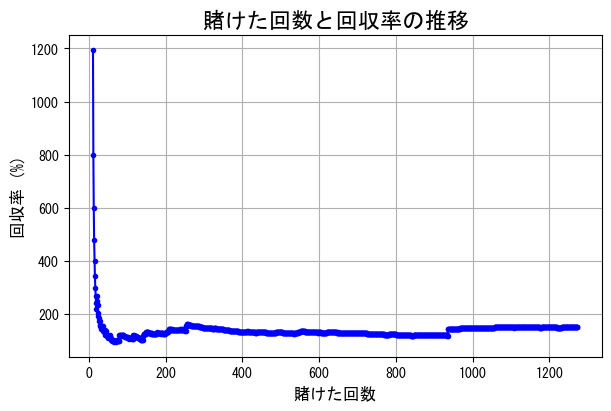

総払い戻し金額: 250510.0円
賭けた回数: 1263回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041905,2390.0,200,200,2390.0,11.950000,2190.0
1,202330042002,0.0,100,300,2390.0,7.966667,2090.0
2,202330042003,0.0,100,400,2390.0,5.975000,1990.0
3,202330042005,0.0,100,500,2390.0,4.780000,1890.0
4,202330042007,0.0,100,600,2390.0,3.983333,1790.0
...,...,...,...,...,...,...,...
1258,202350123004,0.0,100,168000,250250.0,1.489583,82250.0
1259,202350123012,0.0,100,168100,250250.0,1.488697,82150.0
1260,202350123104,260.0,100,168200,250510.0,1.489358,82310.0
1261,202350123107,0.0,100,168300,250510.0,1.488473,82210.0


In [168]:
en.plot_returns_rate(df_cs_t, per_race=False)

In [12]:
# xgb: bet_type = umaren, select_num = 50, max_bet = 600, threshold = 0.6 | returns_rate = 1.45
# xgb: bet_type = umaren, select_num = 60, max_bet = 200, threshold = 0.65 | returns_rate = 1.75
# xgb: bet_type = umaren, select_num = 50, max_bet = 300, threshold = 0.60 | returns_rate = 1.4

In [13]:
len(df_cs_t['race_id'].unique())

7132

In [14]:
en_returns = en.calc_results(df_cs_t, per_race=False)

In [15]:
en_returns['bet_sum'].value_counts()

bet_sum
100    1387
300     393
200     231
Name: count, dtype: int64

In [16]:
pred_df[pred_df['race_id'] == 202348041110][['number', 'predicted_target']]

,number,predicted_target
44854,2,0
44856,4,0
44857,5,0
44858,6,0
44859,7,1
44860,8,1
44861,9,0
44862,10,1


In [21]:
en_returns.iloc[150:200, :]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
150,202330081707,0.0,100,25500,33190.0,1.301569,7690.0
151,202330081708,0.0,100,25600,33190.0,1.296484,7590.0
152,202330081709,0.0,300,25900,33190.0,1.281467,7290.0
153,202330081711,0.0,300,26200,33190.0,1.266794,6990.0
154,202330082202,0.0,100,26300,33190.0,1.261977,6890.0
155,202330082301,0.0,100,26400,33190.0,1.257197,6790.0
156,202330082308,0.0,200,26600,33190.0,1.247744,6590.0
157,202330082309,0.0,100,26700,33190.0,1.243071,6490.0
158,202330082310,0.0,100,26800,33190.0,1.238433,6390.0
159,202330082408,0.0,100,26900,33190.0,1.233829,6290.0


In [58]:
en_returns[en_returns['returns'] > 2000].head(50)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
102,202330080103,2580.0,200,11300,11440.0,1.012389,140.0
133,202330082211,2290.0,100,14900,19630.0,1.317450,4730.0
202,202330100410,2210.0,200,22500,32150.0,1.428889,9650.0
507,202342053101,11260.0,100,58900,79120.0,1.343294,20220.0
625,202343020706,10520.0,100,72800,103900.0,1.427198,31100.0
756,202343121808,2280.0,200,87700,119010.0,1.357013,31310.0
802,202347040504,3330.0,200,93400,127630.0,1.366488,34230.0
909,202347110810,2780.0,100,105900,140960.0,1.331067,35060.0
1031,202348041110,41000.0,100,120300,194370.0,1.615711,74070.0
1038,202348041309,4620.0,200,121300,201140.0,1.658203,79840.0


# 出馬表からの予想結果

In [1]:
import pandas as pd
from datetime import datetime, timedelta

date = (datetime.now() + timedelta(days=1)).strftime('%Y%m%d')

pred_path = 'pred_df-candidates/pred_candidates'

In [40]:
pred_candidates_full = pd.read_csv(f'pred_candidates_full_{date}.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates = pd.read_csv(f'pred_candidates_{date}.csv', sep="\t", encoding='utf-8', index_col=0)

In [28]:
# ファイルのパスを指定して読み込む
pred_candidates_full = pd.read_csv(f'{pred_path}_full_{date}.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates = pd.read_csv(f'{pred_path}_{date}.csv', sep="\t", encoding='utf-8', index_col=0)

In [41]:
pred_candidates_full

,race_id,horse_id,number,place,predicted_proba,predicted_target,bet_sum,total_bet
0,202406050401,2022103311,1,中山,0.672939,1,0.0,0.0
1,202406050401,2022102493,5,中山,0.788477,1,0.0,0.0
2,202406050402,2022106907,8,中山,0.767649,1,0.0,0.0
3,202406050402,2022106818,14,中山,0.862755,1,0.0,0.0
4,202406050403,2022106781,6,中山,0.771537,1,0.0,0.0
5,202406050403,2022103310,12,中山,0.740131,1,0.0,0.0
6,202406050407,2022104888,1,中山,0.902396,1,0.0,0.0
7,202406050407,2022101438,6,中山,0.741950,1,0.0,0.0
8,202406050409,2020103653,6,中山,0.745344,1,0.0,0.0
9,202406050410,2020102964,13,中山,0.831101,1,0.0,0.0


In [42]:
pred_candidates_full_cs = pd.read_csv(f'{pred_path}_full_{date}_cs.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates_cs = pd.read_csv(f'{pred_path}_{date}_cs.csv', sep="\t", encoding='utf-8', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'pred_df-candidates/pred_candidates_full_20241208_cs.csv'

In [43]:
pred_candidates_cs

NameError: name 'pred_candidates_cs' is not defined

In [44]:
df = pred_candidates.copy()

In [45]:
df_cs = pred_candidates_cs.copy()

NameError: name 'pred_candidates_cs' is not defined

In [46]:
# race_idごとにnumberの値をハイフンで結合し、combinationsカラムを作成
df['combinations'] = df.groupby('race_id')['number'].transform(lambda x: '-'.join(map(str, sorted(x.unique()))))

In [47]:
df_cs['combinations'] = df_cs.groupby('race_id')['number'].transform(lambda x: '-'.join(map(str, sorted(x.unique()))))

In [48]:
# race_idごとに条件を満たす最大のnumberをpivot_horseに設定
def get_pivot_horse(group):
    filtered = group[group['predicted_proba'] >= 0.85]
    if not filtered.empty:
        max_row = filtered.loc[filtered['predicted_proba'].idxmax()]
        return max_row['number']
    else:
        return 'None'



# race_idごとにpivot_horseのpredicted_probaをpivot_probaとして取得
def get_pivot_proba(group):
    pivot_number = group['pivot_horse'].iloc[0]
    if pd.notna(pivot_number):
        # pivot_horseに対応するpredicted_probaを取得（行が存在するか確認）
        pivot_proba_row = group.loc[group['number'] == pivot_number, 'predicted_proba']
        if not pivot_proba_row.empty:
            return pivot_proba_row.iloc[0]
    return 'None'

In [49]:
# race_idごとにpivot_horseを計算
pivot_horses = df.groupby('race_id').apply(get_pivot_horse)
df['pivot_horse'] = df['race_id'].map(pivot_horses)
# pivot_probaカラムをrace_idごとに追加
pivot_probas = df.groupby('race_id').apply(get_pivot_proba)
df['pivot_proba'] = df['race_id'].map(pivot_probas)

C:\Users\SV8\AppData\Local\Temp\ipykernel_7280\2872854508.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_horses = df.groupby('race_id').apply(get_pivot_horse)
C:\Users\SV8\AppData\Local\Temp\ipykernel_7280\2872854508.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_probas = df.groupby('race_id').apply(get_pivot_proba)


In [50]:
pivot_horses = df_cs.groupby('race_id').apply(get_pivot_horse)
df_cs['pivot_horse'] = df_cs['race_id'].map(pivot_horses)
pivot_probas = df_cs.groupby('race_id').apply(get_pivot_proba)
df_cs['pivot_proba'] = df_cs['race_id'].map(pivot_probas)

KeyError: 'predicted_proba'

In [51]:
df.drop(['horse_id', 'number', 'predicted_proba', 'predicted_target'], axis=1).drop_duplicates()

,race_id,place,bet_sum,total_bet,combinations,pivot_horse,pivot_proba
10,202406050411,中山,100.0,100.0,2-7-9,2,0.858864
18,202407040404,中京,100.0,200.0,4-5-8,None,None
25,202408070402,京都,300.0,500.0,2-3-5-6,6,0.877499
30,202408070406,京都,100.0,600.0,2-4-5,None,None
36,202408070409,京都,100.0,700.0,5-7-9,None,None


In [13]:
df_cs.drop(['horse_id', 'number', 'predicted_proba', 'predicted_target'], axis=1).drop_duplicates()

,race_id,place,bet_sum,total_bet,combinations,pivot_horse,pivot_proba
2,202448120606,名古屋,100.0,100.0,7-10,None,None
4,202448120607,名古屋,100.0,200.0,2-12,None,None
12,202448120612,名古屋,100.0,300.0,7-11,None,None


In [ ]:
# トータル収支 (11/9更新モデル) : center 11/15 ~
# -2100 + 1480 + 210 : -410
# -410 - 2000 + 720 : -1690
# -1690 - 2200 + 2500 : -1390
# トータル収支 (11/22更新モデル) : center 11/23 ~
# -1390 - 2900 + 1370 + 370 : -2920
# -2920 - 3100 : -6020
# トータル収支 (11/29更新モデル)
# -6020 - 2900 : -8920
# -8920 - 3800 + 4390 : -8330
# -8330 - 5200 + 190 + 620 + 290 + 2300 : -10130
# トータル収支 (12/7更新モデル)
# -10130 - 700

-10130

In [10]:
# トータル収支 (11/26モデル更新) : countryside 11/28 ~
# -1200 + 290 + 910 + 420 : 420
# トータル収支 (11/29モデル更新)
# 420 - 1300 : -880
# -880 -2000 + 300 : -2580
# -2580 - 1800 + 110 + 1180 : -3090
# -3090 - 300 : -3390